In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data=pd.read_csv('fire_archive_M6_67636.csv')
print(data.shape)
data.head()
for i in range(len(data)): 
    data.loc[i,'Day'] = int(data.loc[i,'acq_date'].split('-')[2])
    data.loc[i,'Month'] = int(data.loc[i,'acq_date'].split('-')[1])
    data.loc[i,'Year'] = int(data.loc[i,'acq_date'].split('-')[0])
print(data['Day'][0])
print(data['Month'][0])
print(data['Year'][0])
data.head()
data.describe()

(33241, 15)
1.0
5.0
2017.0


,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,Day,Month,Year
count,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000,33241.000000
mean,30.402413,75.299371,320.834151,1.358178,1.131753,782.800818,62.489727,6.200316,301.783716,16.650453,0.000722,15.857886,9.605577,2017.556722
std,0.524559,0.679308,9.048738,0.555128,0.182780,118.720236,16.061561,0.005611,5.413613,16.026196,0.037994,9.449423,2.250042,0.503098
min,28.700100,74.000200,300.100000,1.000000,1.000000,459.000000,0.000000,6.200000,275.000000,2.500000,0.000000,1.000000,1.000000,2017.000000
25%,30.045400,74.727100,314.400000,1.000000,1.000000,759.000000,53.000000,6.200000,299.000000,8.200000,0.000000,7.000000,10.000000,2017.000000
50%,30.414500,75.252900,318.400000,1.100000,1.100000,812.000000,65.000000,6.200000,300.900000,12.500000,0.000000,16.000000,10.000000,2018.000000
75%,30.780000,75.819400,326.000000,1.500000,1.200000,824.000000,74.000000,6.200000,303.100000,19.800000,0.000000,24.000000,11.000000,2018.000000
max,31.499900,76.799900,400.000000,4.800000,2.000000,2124.000000,100.000000,6.300000,328.600000,1104.700000,2.000000,31.000000,12.000000,2019.000000


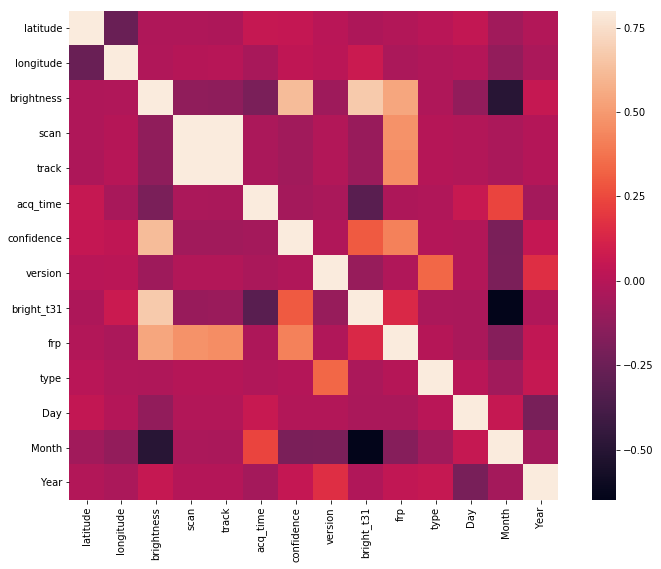

In [3]:
cormat=data.corr()
fig=plt.figure(figsize =(12,9))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()

In [7]:
br=data['brightness']
br_31=data['bright_t31']
mon=data['Month']
con=data['confidence']
pwr=data['frp']
print(br.shape)
print(br_31.shape)
print(mon.shape)
print(con.shape)

(33241,)
(33241,)
(33241,)
(33241,)


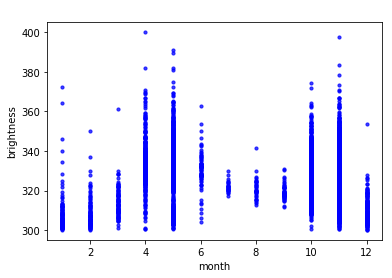

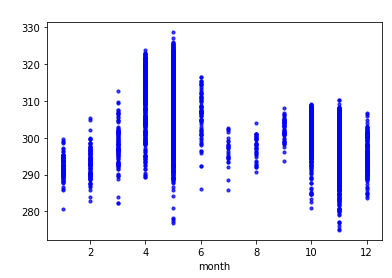

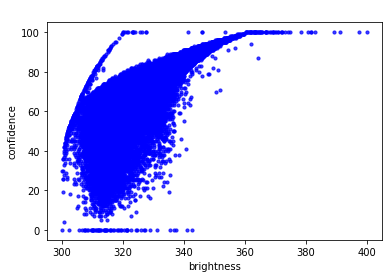

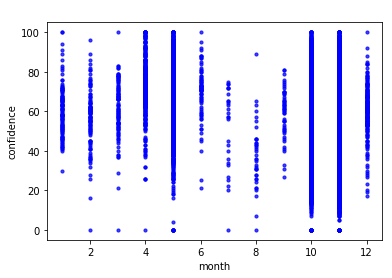

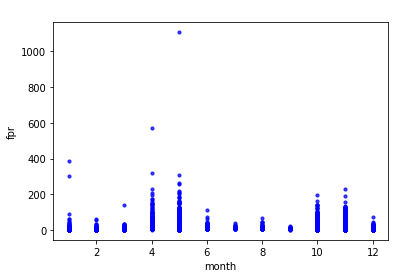

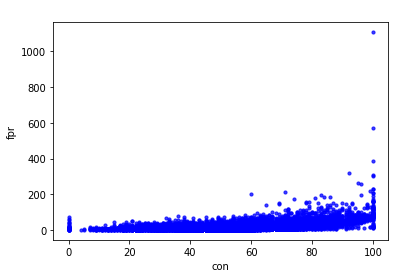

In [9]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(mon,br,'month','brightness')
scatterplot(mon,br_31,'month')
scatterplot(br,con,'brightness','confidence')
scatterplot(mon,con,'month','confidence')
scatterplot(mon,pwr,'month','fpr')
scatterplot(con,pwr,'con','fpr')